# Disadvantages Of ANN for image classification
- Too much computation.
- Treats local pixels same as pixels far apart.
- Sensitive to location of an object in an image


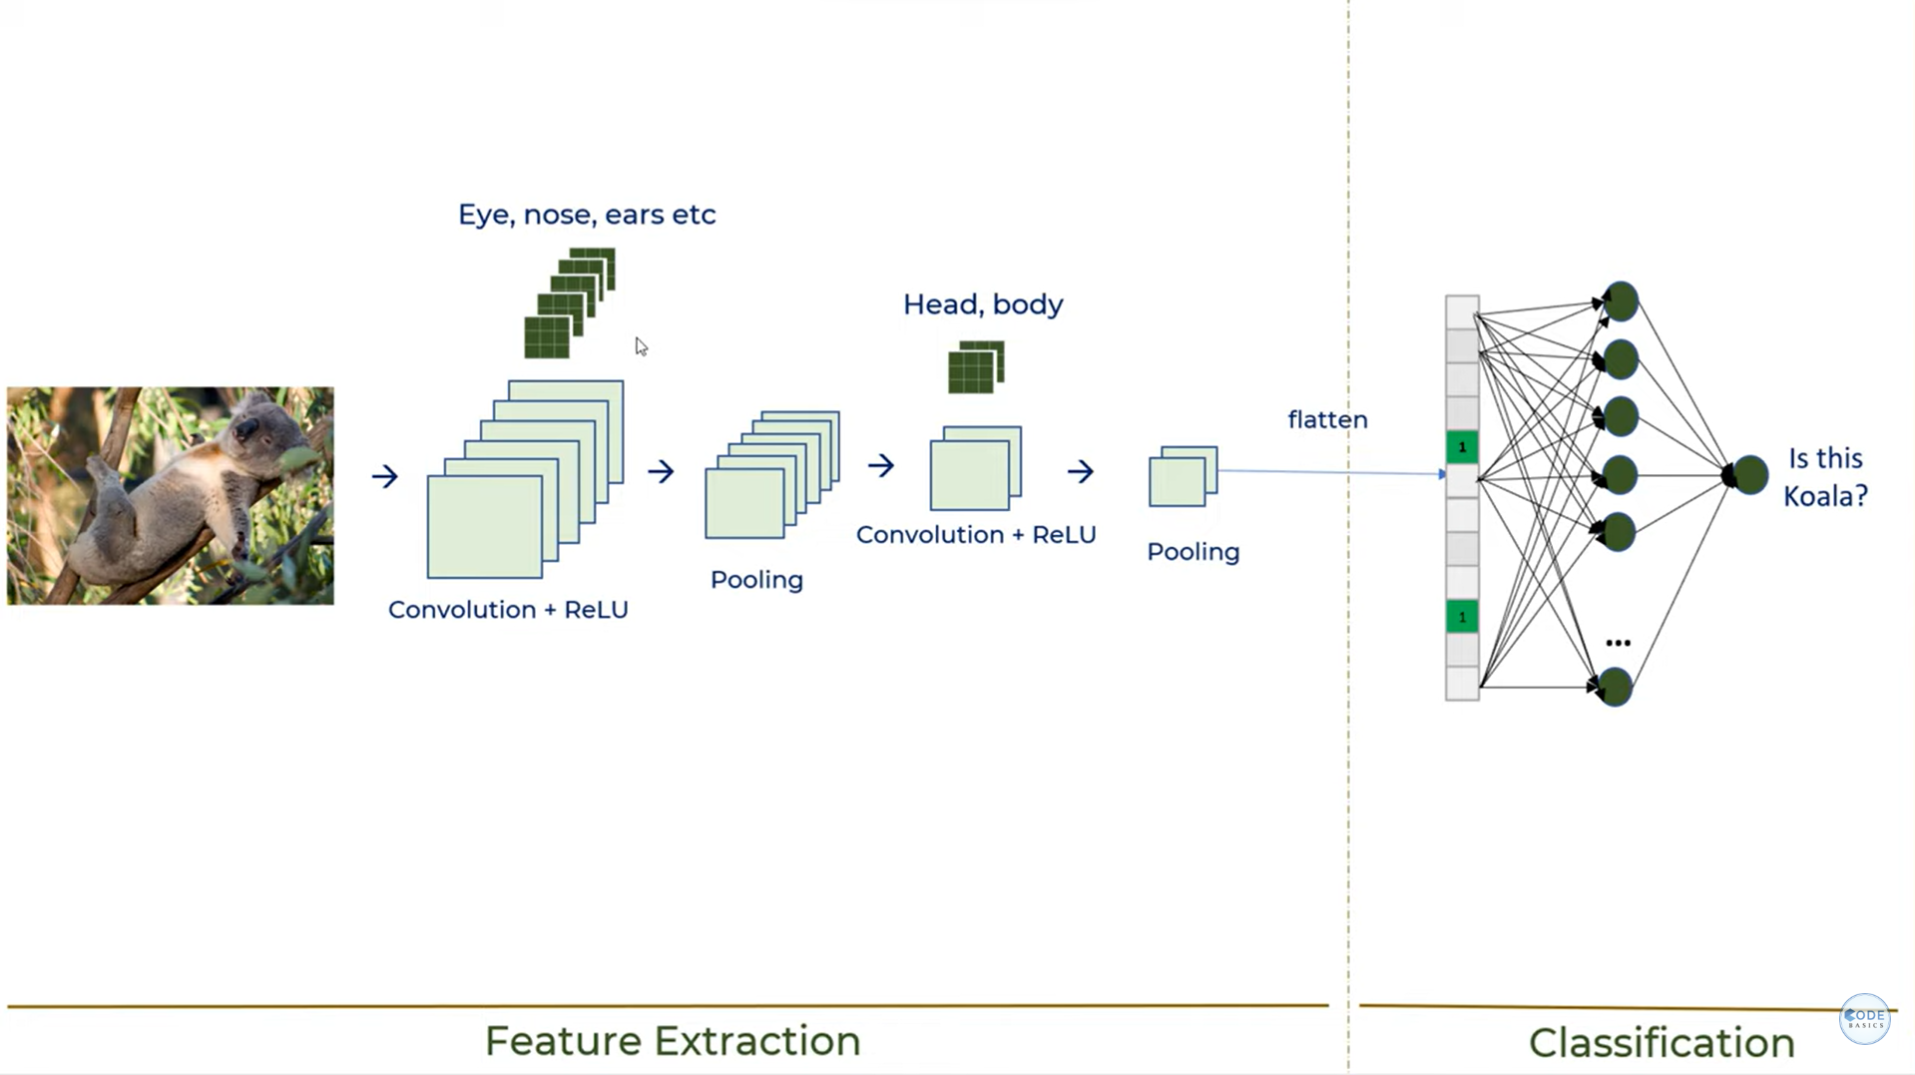

# Benefits of Convolution,ReLU,Pooling

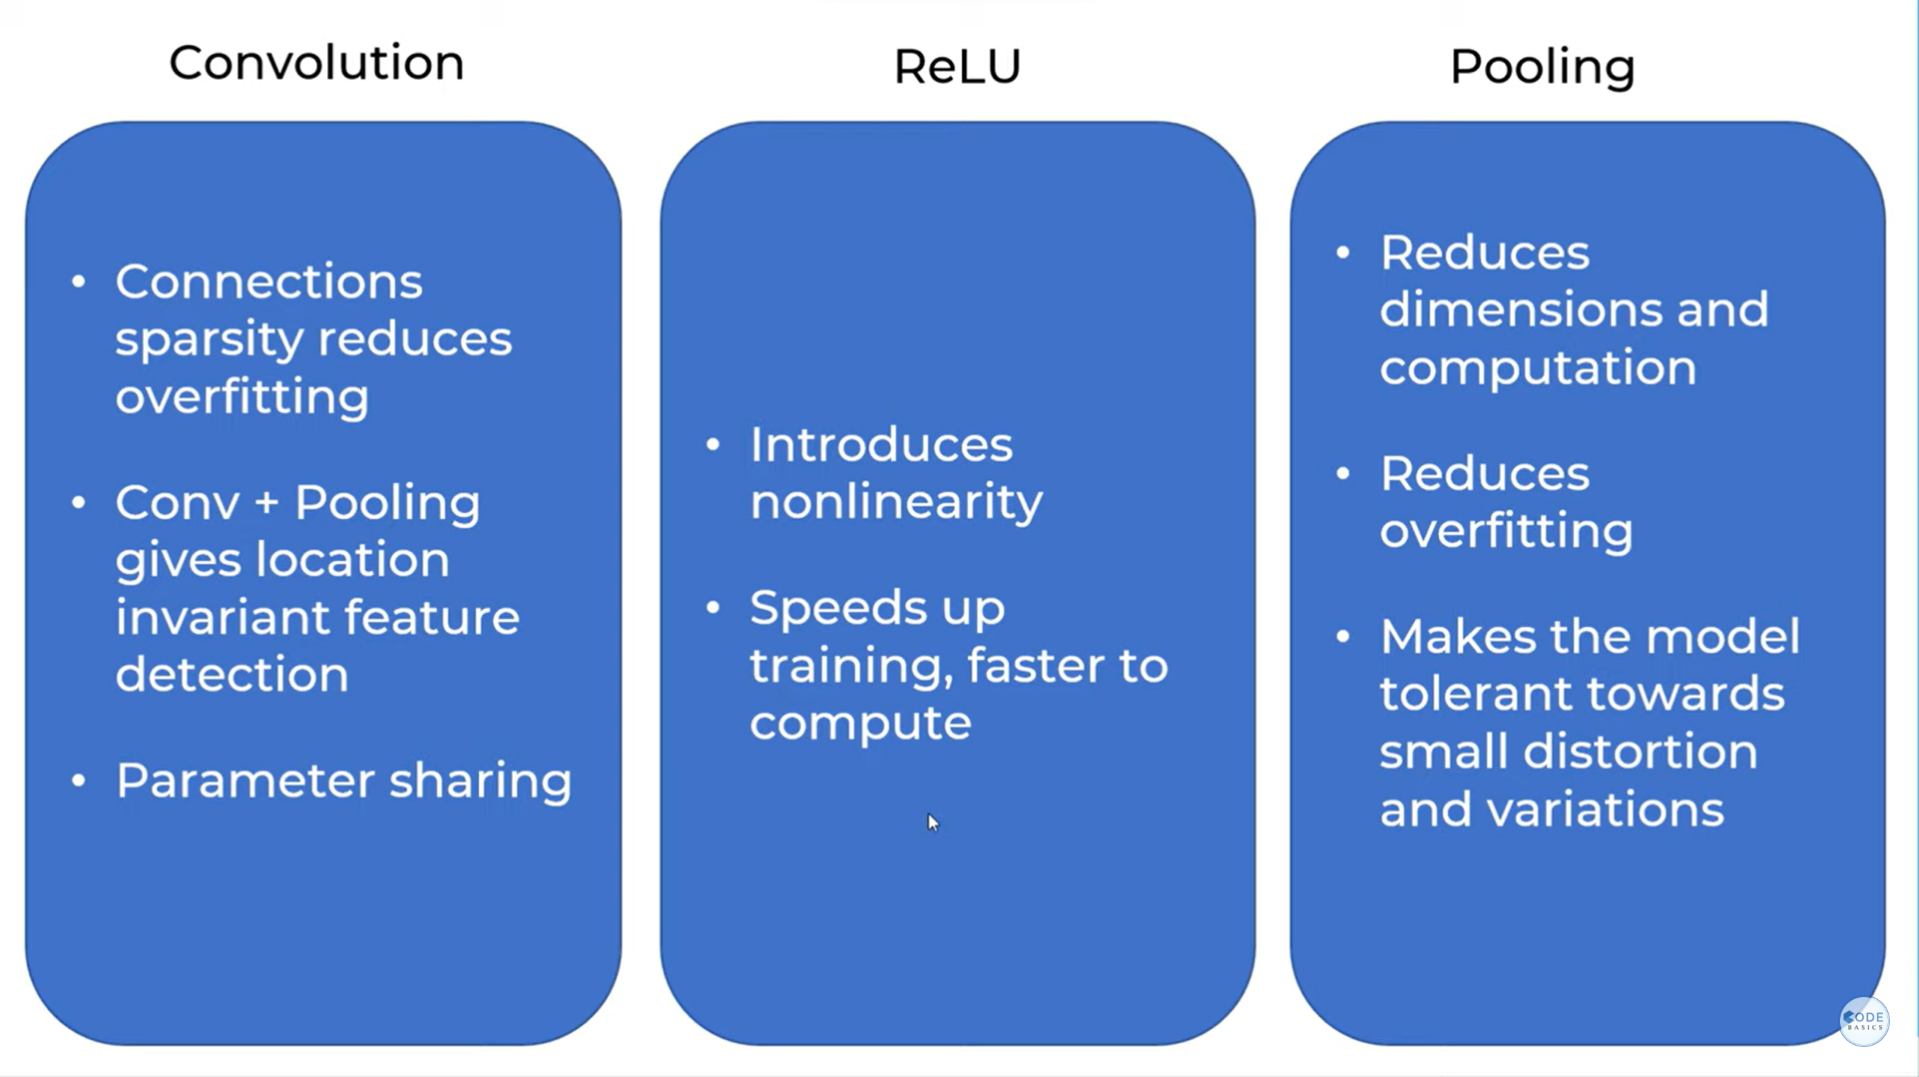

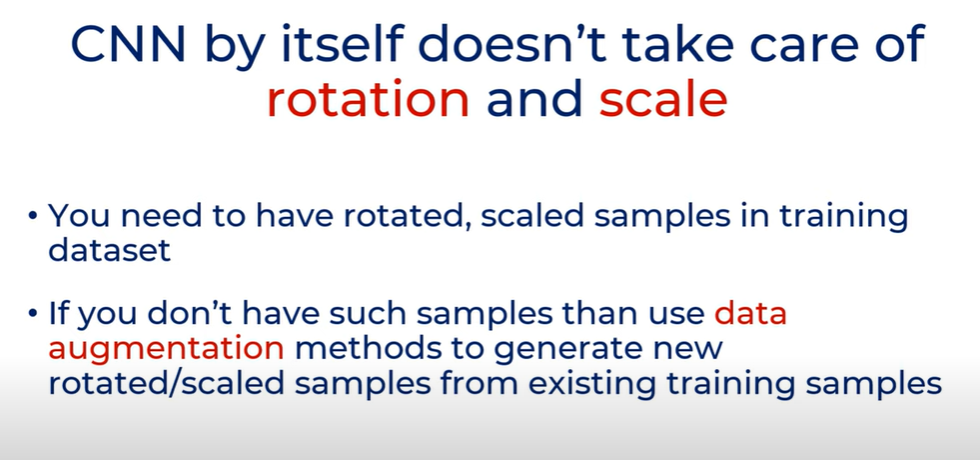

# Small Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

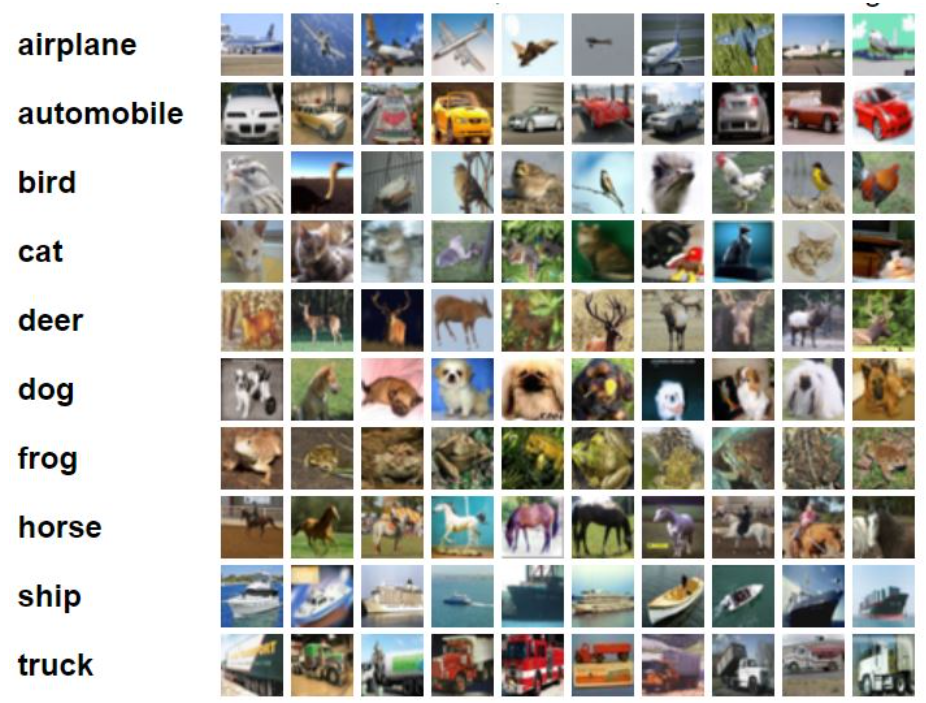

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load the dataset**

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

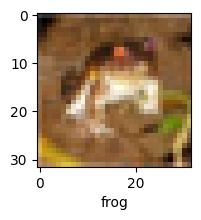

In [ ]:
plot_sample(X_train, y_train, 0)

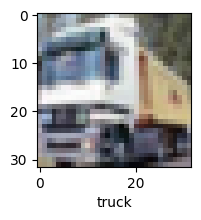

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

**Normalizing the training data**

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Build simple artificial neural network for image classification**

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.3068 - loss: 1.9254
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.4256 - loss: 1.6374
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 82ms/step - accuracy: 0.4517 - loss: 1.5566
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 76ms/step - accuracy: 0.4743 - loss: 1.4941
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 81ms/step - accuracy: 0.4957 - loss: 1.4295


You can see that at the end of 5 epochs, accuracy is at around 49%

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.68      0.55      1000
           1       0.62      0.58      0.60      1000
           2       0.37      0.42      0.39      1000
           3       0.33      0.43      0.38      1000
           4       0.57      0.26      0.35      1000
           5       0.51      0.23      0.32      1000
           6       0.58      0.47      0.52      1000
           7       0.52      0.60      0.55      1000
           8       0.61      0.63      0.62      1000
           9       0.50      0.62      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



**Now let us build a convolutional neural network to train our images**

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.3896 - loss: 1.6704
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.6086 - loss: 1.1196
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.6584 - loss: 0.9802
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.6954 - loss: 0.8876
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7187 - loss: 0.8158
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7389 - loss: 0.7558
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7572 - loss: 0.6998
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7732 - loss: 0.6546
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7835 - loss: 0.6196
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.8001 - loss: 0.5735


With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6963 - loss: 0.9194


[0.9314938187599182, 0.6980000138282776]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[3.31706880e-03, 7.38494200e-05, 8.23756738e-04, 8.98713589e-01,
        3.20335123e-04, 6.88354950e-03, 2.26352047e-02, 4.89807780e-06,
        6.65479377e-02, 6.79810939e-04],
       [4.47233254e-03, 1.14883326e-01, 1.10434007e-06, 7.40076942e-08,
        8.21961123e-07, 1.07118348e-09, 1.00139334e-06, 2.20133026e-11,
        8.80359411e-01, 2.81874352e-04],
       [1.90325394e-01, 9.14473012e-02, 1.33899902e-03, 2.65545025e-03,
        7.36058457e-04, 3.23794811e-04, 1.00025011e-03, 4.82583331e-04,
        6.91605389e-01, 2.00847089e-02],
       [9.48030651e-01, 3.18762921e-02, 3.53386306e-04, 4.50819149e-04,
        5.25080319e-03, 7.58608530e-06, 3.99714772e-04, 1.08386930e-05,
        1.11054657e-02, 2.51435349e-03],
       [5.51555386e-05, 3.30945863e-06, 2.13973154e-03, 4.66472842e-03,
        6.60784900e-01, 1.29127689e-03, 3.31058264e-01, 8.09578751e-07,
        1.59976810e-06, 3.02768569e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

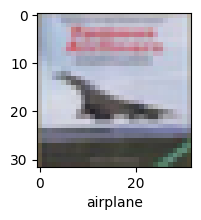

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[3]]

'airplane'

# Handwritten digits classification using CNN

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

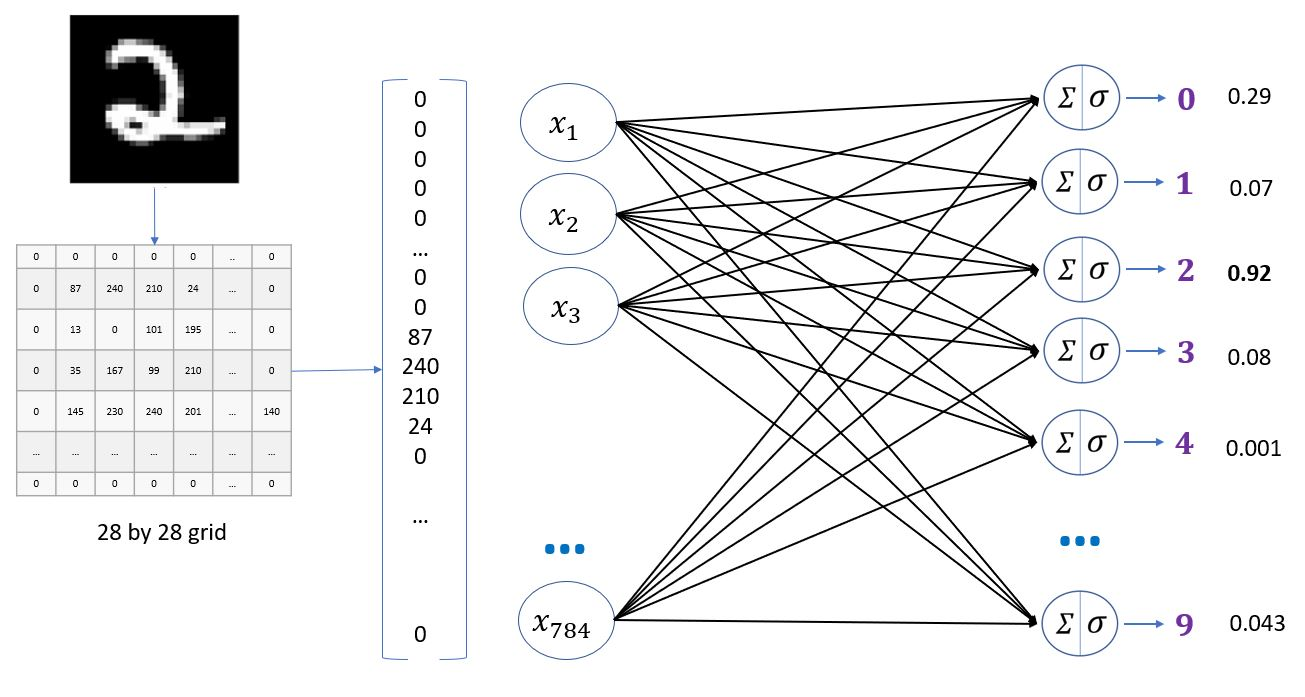

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

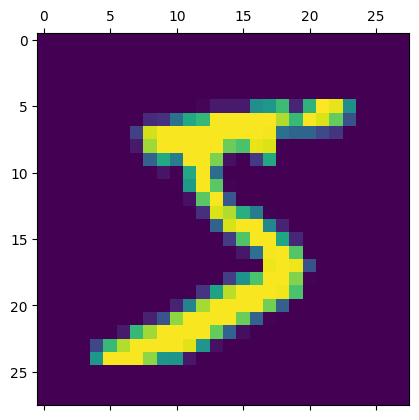

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

**Using ANN for classification**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8740 - loss: 0.4393
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9620 - loss: 0.1297
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9748 - loss: 0.0862
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9810 - loss: 0.0632
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9838 - loss: 0.0514
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0403
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9895 - loss: 0.0331
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0260
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9934 - loss: 0.0225
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9945 - loss: 0.0186


In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9689 - loss: 0.1050


[0.09310850501060486, 0.9725000262260437]

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

**Using CNN for classification**

In [ ]:
model = keras.Sequential([

    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9119 - loss: 0.3022
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9828 - loss: 0.0558
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9896 - loss: 0.0330
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9938 - loss: 0.0215
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9954 - loss: 0.0143


In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9775 - loss: 0.0747


[0.05542636290192604, 0.9829000234603882]

# **Convolution Padding**

In Convolutional Neural Networks (CNNs), *padding* refers to the process of adding extra pixels around the edges of an image before applying a convolution operation. Padding helps control the spatial size of the output feature map, ensuring it doesn't shrink too much with each convolutional layer.

### Why Use Padding?
When we apply a convolution operation to an image, we slide a filter (or kernel) across it. If we don't add padding, the filter only covers the center parts of the image and doesn't fully cover the edges. This often results in a smaller output image and loss of edge information.

By adding padding, we make sure the filter covers the entire image, including the edges, which helps retain the image size and capture more edge features.

### Types of Padding
1. **Valid Padding (No Padding)**: No extra pixels are added. The output size is smaller than the input.
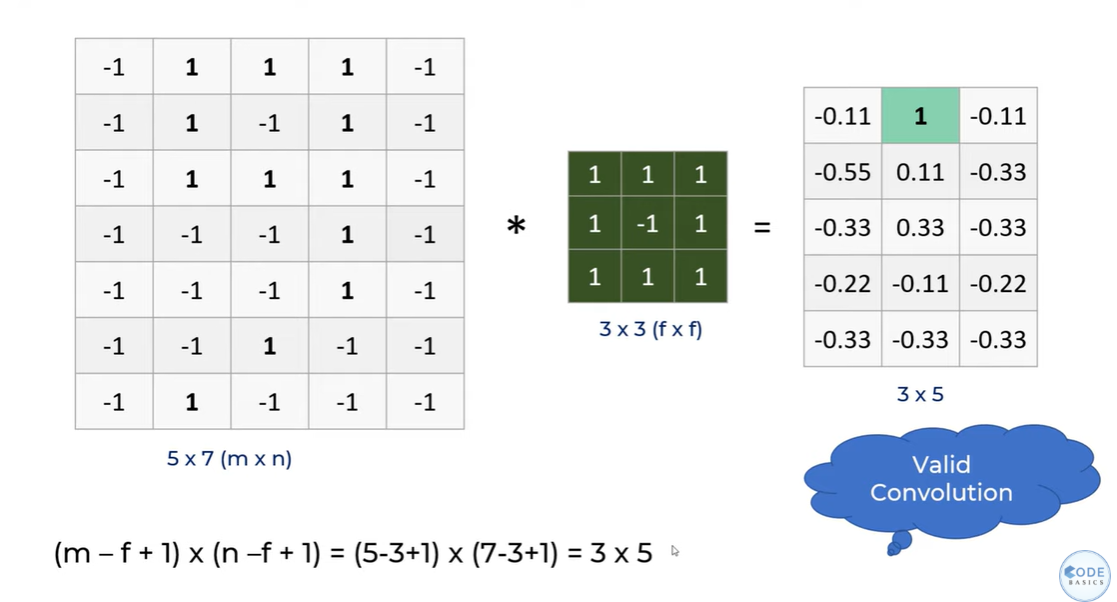

2. **Same Padding**: Extra pixels are added so that the output size matches the input size.
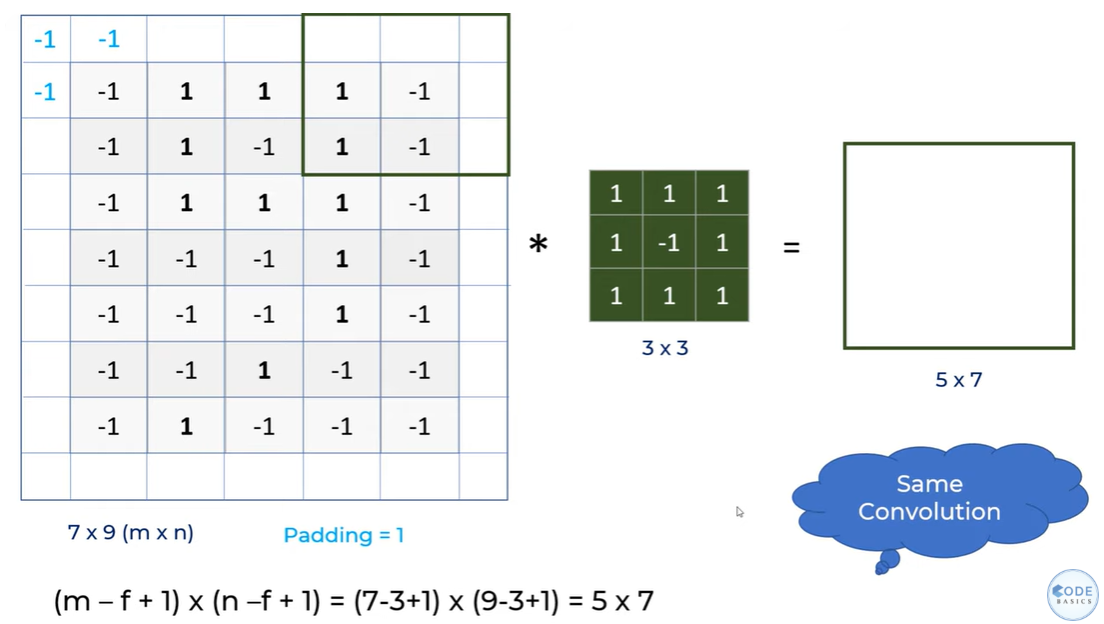

### Example of Padding

Let's say we have a 3x3 filter (kernel) and a 5x5 input image.

#### Without Padding (Valid Padding)
1. The filter only moves over the image's middle area.
2. As a result, the output will be smaller than the input. For a 5x5 input with a 3x3 filter, the output will be 3x3.

#### With Padding (Same Padding)
1. Add a border of one pixel around the 5x5 image, making it 7x7.
2. Now, the filter can cover the edges fully, and the output will have the same size as the input (5x5).
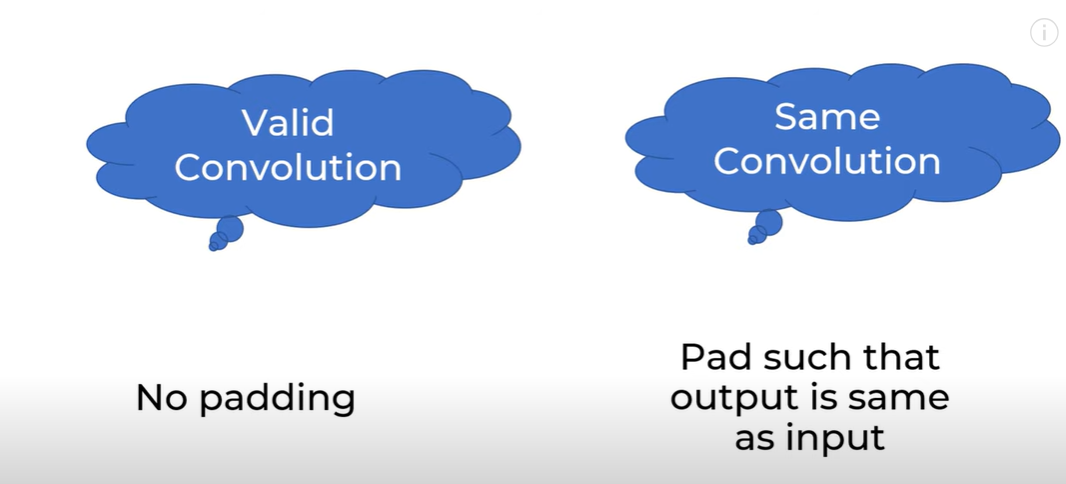

### Simple Analogy
Imagine you’re painting a picture that reaches the edge of a canvas. If you put a frame (padding) around it, you get more space to work and can paint right up to the edges without losing any part of the original canvas. Padding in CNNs serves a similar purpose by allowing the filter to capture edge information without reducing the original size.

# **Stride**

In Convolutional Neural Networks (CNNs), *stride* refers to the number of pixels by which we slide the filter (or kernel) across the input image when performing a convolution. Stride controls how much the filter shifts each time it moves along the image, which affects the output size and computation.

### How Stride Works
1. When the stride is **1**, the filter moves one pixel at a time. This results in a more detailed output but can be computationally expensive and result in a larger output feature map.
2. When the stride is **2** or more, the filter jumps more pixels at a time, skipping some areas. This creates a smaller output feature map since fewer positions are covered.

### Example of Stride

Let's consider a 5x5 input image and a 3x3 filter:

#### Stride of 1
- The filter moves 1 pixel at a time across the image.
- For a 5x5 input and a 3x3 filter with stride 1, the output will be 3x3 because the filter covers more areas.

#### Stride of 2
- The filter moves 2 pixels at a time, covering fewer locations.
- For the same 5x5 input and 3x3 filter, using a stride of 2 will produce a smaller 2x2 output, as the filter skips over some pixels.
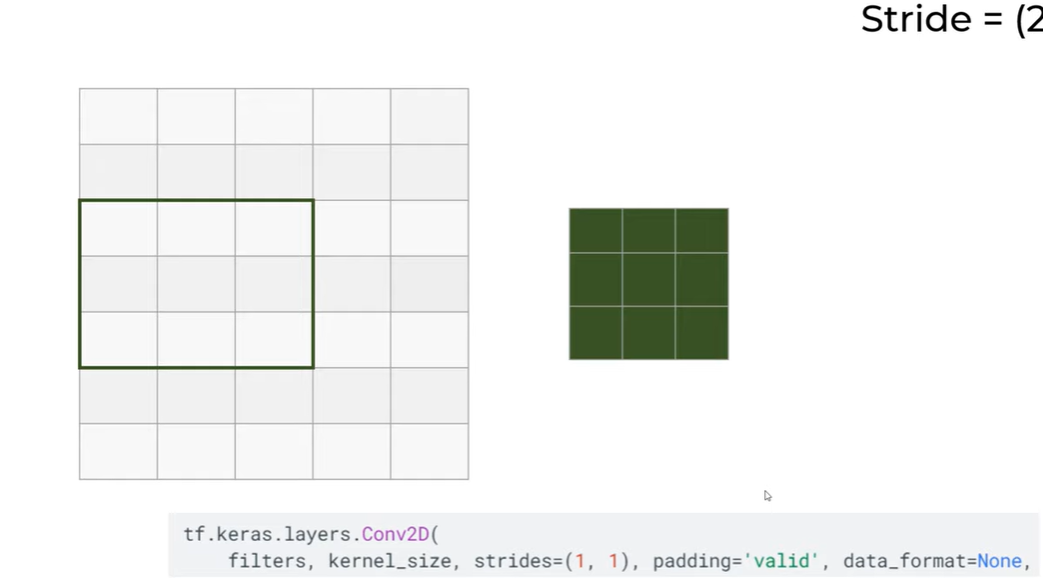

### Simple Analogy
Imagine sweeping a floor. If you move the broom by small steps, you cover more ground in detail. If you take bigger steps, you cover less of the floor but do so more quickly. Similarly, in CNNs, a smaller stride means a more detailed output, while a larger stride means a smaller, more efficient output.

In summary:
- A smaller stride = larger, more detailed output
- A larger stride = smaller, faster, less detailed output